Questions:

In [1]:
import numpy as np
import pandas as pd
import string
import os

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style='white')

DATA_DIR = 'Data/'
NCES_DIR = 'nces/'

# Read data

In [2]:
df = pd.read_csv(os.path.join(DATA_DIR, 'AR_un_locations.csv'))
print(df.shape)
pd.concat((df.head(3), df.tail(3)), axis=0)

(1846, 23)


,un_loc,LociD,DudeAccountNumber,SalesForceAccountID,EducationID,ClientName,SchoolDudeReference,PhoneNumber,Address1,City,...,Market,Industry,StudentCount,LocDesc,LocSquareFootage,LocationZip,Zipnum,COUNTYNM,County,Regions
0,397758056-9.0,9.0,397758056,001000000034cEeAAI,500026.0,Pine Bluff School District,0,(870) 543-4200,512 Pine Street,Pine Bluff,...,Education,Education,4944,Pine Bluff High School,279283.0,NaN,71601,Jefferson,Jefferson,Timberlands
1,397758056-10.0,10.0,397758056,001000000034cEeAAI,500026.0,Pine Bluff School District,0,(870) 543-4200,512 Pine Street,Pine Bluff,...,Education,Education,4944,Jack Robey Jr. High School,115073.0,NaN,71601,Jefferson,Jefferson,Timberlands
2,397758056-7.0,7.0,397758056,001000000034cEeAAI,500026.0,Pine Bluff School District,0,(870) 543-4200,512 Pine Street,Pine Bluff,...,Education,Education,4944,W. T. Cheney Elementary School,59942.0,NaN,71601,Jefferson,Jefferson,Timberlands
1843,465761140-14724.0,14724.0,465761140,00100000004DIavAAG,513680.0,Waldron Public Schools,0,(479) 637-3179,1560 W. Sixth St.,Waldron,...,Education,Education,1730,ZZ Do Not Use All Locations,0.0,NaN,72958,Scott,Scott,Ouachitas
1844,465761140-14720.0,14720.0,465761140,00100000004DIavAAG,513680.0,Waldron Public Schools,0,(479) 637-3179,1560 W. Sixth St.,Waldron,...,Education,Education,1730,Elementary School Campus,99312.0,NaN,72958,Scott,Scott,Ouachitas
1845,465761140-14719.0,14719.0,465761140,00100000004DIavAAG,513680.0,Waldron Public Schools,0,(479) 637-3179,1560 W. Sixth St.,Waldron,...,Education,Education,1730,Middle School Campus,96834.0,NaN,72958,Scott,Scott,Ouachitas


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 23 columns):
un_loc                 1846 non-null object
LociD                  1800 non-null float64
DudeAccountNumber      1846 non-null int64
SalesForceAccountID    1846 non-null object
EducationID            1836 non-null float64
ClientName             1846 non-null object
SchoolDudeReference    1846 non-null int64
PhoneNumber            1846 non-null object
Address1               1846 non-null object
City                   1846 non-null object
State                  1846 non-null object
ZipCode                1846 non-null object
Country                1846 non-null object
Market                 1846 non-null object
Industry               1846 non-null object
StudentCount           1846 non-null int64
LocDesc                1799 non-null object
LocSquareFootage       1780 non-null float64
LocationZip            0 non-null float64
Zipnum                 1846 non-null int64
COUNTYNM        

In [4]:
#df.dropna(axis=0, how='any', subset=['EducationID'], inplace=True)
print(df.shape)

(1846, 23)


In [5]:
df.columns

Index(['un_loc', 'LociD', 'DudeAccountNumber', 'SalesForceAccountID',
       'EducationID', 'ClientName', 'SchoolDudeReference', 'PhoneNumber',
       'Address1', 'City', 'State', 'ZipCode', 'Country', 'Market', 'Industry',
       'StudentCount', 'LocDesc', 'LocSquareFootage', 'LocationZip', 'Zipnum',
       'COUNTYNM', 'County', 'Regions'],
      dtype='object')

In [6]:
df.LocDesc.head()

0            Pine Bluff High School
1        Jack Robey Jr. High School
2    W. T. Cheney Elementary School
3                         Warehouse
4       Southwood Elementary School
Name: LocDesc, dtype: object

In [7]:
db = pd.read_csv(os.path.join(DATA_DIR,'ccd_sch_029_1617_w_0e_050317.csv' ), encoding='iso-8859-1')
db.NCESSCH = db.NCESSCH.astype(str)
db['LEAIDs'] = db.LEAID.astype(str)
print(db.shape)
pd.concat((db.head(3), db.tail(3)), axis=0)

C:\Users\lprevost\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (14,15,21,22,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(102071, 66)


,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,...,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED,LEAIDs
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,No,No,No,7,12,High,As reported,100002
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,No,No,No,7,12,High,As reported,100002
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,No,No,No,7,12,High,As reported,100002
102068,2016-2017,78,U.S. VIRGIN ISLANDS,VI,YVONNE BOWSKY ELEMENTARY SCHOOL,Saint Thomas - Saint John School District,1,NaN,VI-001,7800030,...,Not reported,Not reported,Not reported,Not reported,Not reported,M,M,Not reported,As reported,7800030
102069,2016-2017,78,U.S. VIRGIN ISLANDS,VI,CANCRYN JUNIOR HIGH SCHOOL,Saint Thomas - Saint John School District,1,NaN,VI-001,7800030,...,Not reported,Not reported,Not reported,Not reported,Not reported,M,M,Not reported,As reported,7800030
102070,2016-2017,78,U.S. VIRGIN ISLANDS,VI,BERTHA BOSCHULTE JUNIOR HIGH,Saint Thomas - Saint John School District,1,NaN,VI-001,7800030,...,Not reported,Not reported,Not reported,Not reported,Not reported,M,M,Not reported,As reported,7800030


In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102071 entries, 0 to 102070
Data columns (total 66 columns):
SCHOOL_YEAR            102071 non-null object
FIPST                  102071 non-null int64
STATENAME              102071 non-null object
ST                     102071 non-null object
SCH_NAME               102071 non-null object
LEA_NAME               102071 non-null object
STATE_AGENCY_NO        102071 non-null int64
UNION                  2531 non-null float64
ST_LEAID               102071 non-null object
LEAID                  102071 non-null int64
ST_SCHID               102071 non-null object
NCESSCH                102071 non-null object
SCHID                  102071 non-null int64
MSTREET1               102071 non-null object
MSTREET2               1823 non-null object
MSTREET3               26 non-null object
MCITY                  102071 non-null object
MSTATE                 102071 non-null object
MZIP                   102071 non-null int64
MZIP4                  6038

# Match EducationID to NCESSCH (CCD Unique School Identifier)

In [9]:
print(df.EducationID.unique().shape)
df.EducationID = df.EducationID.astype(str)
df.EducationID = df.EducationID.map(lambda s: s[:-2] if s[-2:]==".0" else s)
print(df.EducationID.str.len().value_counts())
df.EducationID.unique()

(232,)
6    1836
3      10
Name: EducationID, dtype: int64


array(['500026', '514140', '505410', '513930', '504800', '505170',
       '505500', '500042', '507710', '508640', '509630', '509840',
       '505470', '500067', '514400', '500028', '500006', '507290',
       '506060', '500032', '511220', '505680', '507110', '507230',
       '508340', '500044', '512510', '512930', '512630', '507840',
       '502580', '503300', '500049', '505340', '506240', '506360',
       '507860', '500065', '509780', '510380', '504110', '513110',
       '511820', '500030', '506420', '508670', '504860', '507890',
       '506690', '502430', '503240', '510980', '507920', '500073',
       '509750', '510170', '509990', '510320', '503770', '508610',
       '500405', '502670', '502700', '502790', '502880', '512570',
       '507320', '505580', '502960', '503480', '503630', '503690',
       '503750', '503960', '510410', '504350', '504410', '504590',
       '505190', '500001', '505850', '506900', '507140', '514370',
       '507530', '514040', 'nan', '504170', '509060', '509600'

In [10]:
def load_files(fname='usps.csv', output = 'dict'):
    """
    load abbreviation from file fname
    return dictionary {pattern : replacement}
    return list [list of items to remove from strings to avoid]
    """
    if output == "dict":
        df = pd.read_csv(fname, index_col='pattern')
        return df.to_dict()
    elif output == "list":
        df = pd.read_csv(fname, header=0)
        col = df.columns[0]
        return df[col].tolist()

USPS = load_files('usps.csv')
SCHOOL_ABREV = load_files('school_abbrev.csv')
SCHOOL_NOISYWORDS = load_files('school_noisywords.csv', output = "list")

def handle_strings(x, exclude=set(string.punctuation)):
    """
    Helper function to make string all caps and remove punctuation.
    
    x: any string
    """
    
    x = x.replace('-', ' ')
    x = ''.join(ch for ch in x if ch not in exclude)
    return x

def handle_words(x, exclude=[], case = 'u'):
    ''' Helper function to remove words from match comparisons that don't have signal but are noisy 
    
        x: any string
        exclude = list of words that are removed from comparison strings for matching.
    '''
    case = case[0].lower()
    exclude = [word.lower() for word in exclude]
    x = x.lower().split(" ")
    x = ' '.join(word for word in x if word not in exclude)
    if case == 'u':
        if type(x) is str:
            x = x.upper()
        else:
            x = [word.upper() for word in x]
    return x

words = "Lee Prevost Junior Senior High School"
print ('words_handled ', handle_words(words, exclude = SCHOOL_NOISYWORDS))

def normalizeText(inputValue, d={}, case='u', noise_list = None):
    '''
    if case=='l', returns lowercase
    if case=='u', returns uppercase
    else returns proper case
    d = dictionary to use for replacements
    '''
    
    case = case[0].lower()
    abbv = d
    words = inputValue.split()
    for i,word in enumerate(words):
        w = handle_strings(word.lower())
        rep = abbv[w] if w in abbv.keys() else handle_strings(words[i])
        words[i] = rep.upper() if case == 'u' else rep.lower() if case == 'l' else (rep[0].upper() + rep[1:])
    
    return ' '.join(words)

def norm_shorthand(inputValue, case = 'u', short_hand = []):
    ''' fixes cases when short-hand is used eg. "Prevost elementary" vs. "Prevost elementary school'''
    case = case[0].lower()
    words = inputValue.split()
    short_hand = ['elementary', 'middle', 'high', 'intermediate']
    if words[-1].lower() in short_hand:
        
        if case == 'l':
            words[-1] = words[-1].replace(words[-1], words[-1] + ' school').lower()
            
        else:
            words[-1] = words[-1].replace(words[-1], words[-1] + ' school').upper()
        
        
    return ' '.join(words)


s = '1020 W. Holland Avenue.'
print("%s -> %s" % (s, normalizeText(s, d = USPS)))
    
s = 'JNPSD WARREN DUPREE ES'
print("%s -> %s" % (s, normalizeText(s, d = SCHOOL_ABREV['replacement'])))

s = 'Johnson middle'
print("%s -> %s" % (s, norm_shorthand(s)))

words_handled  LEE PREVOST
1020 W. Holland Avenue. -> 1020 W HOLLAND AVENUE
JNPSD WARREN DUPREE ES -> JNPSD WARREN DUPREE ELEMENTARY SCHOOL
Johnson middle -> Johnson MIDDLE SCHOOL


In [11]:
SCHOOL_NOISYWORDS

['school',
 'middle',
 'high',
 'junior',
 'senior',
 'charter',
 'magnet',
 'senior',
 'elementary']

In [12]:
df['normLocDesc'] = df.LocDesc.astype(str).map(lambda x: normalizeText(x, d=SCHOOL_ABREV['replacement']))
df['normLocDesc'] = df.normLocDesc.astype(str).map(lambda x: normalizeText(x, d=USPS))
df['normLocDesc'] = df.normLocDesc.astype(str).map(lambda x: norm_shorthand(x))

In [13]:
df.normLocDesc

0                                  PINE BLUFF HIGH SCHOOL
1                           JACK ROBEY JUNIOR HIGH SCHOOL
2                            W T CHENEY ELEMENTARY SCHOOL
3                                               WAREHOUSE
4                             SOUTHWOOD ELEMENTARY SCHOOL
5               PINE BLUFF SCHOOL ADMINISTRATION BUILDING
6                                              FIRST WARD
7                                 SOUTHEAST MIDDLE SCHOOL
8                                  JORDAN CHANAY BUILDING
9                        GIFTEDTALENTED SCOGGINS MAY HALL
10                              MAINTENANCETRANSPORTATION
11                 PINE BLUFF SCHOOLS ADMINISTRATION BLDG
12                            BROADMOOR ELEMENTARY SCHOOL
13                                          BELAIR SCHOOL
14                    THIRTY FOURTH AVE ELEMENTARY SCHOOL
15                     FORREST PARK GREENVILLE PRE SCHOOL
16                             OAK PARK ELEMENTARY SCHOOL
17            

In [14]:
db['norm_SCH_NAME']= db['SCH_NAME'].map(lambda x: normalizeText(x, d=SCHOOL_ABREV['replacement']))
db['norm_SCH_NAME']= db['norm_SCH_NAME'].map(lambda x: normalizeText(x, d=USPS))

In [15]:
education_ids = set(df.EducationID.unique())
db_district = db[db.LEAIDs.isin(education_ids)]
print(db_district.shape)

(1015, 67)


# Match 1 example

In [16]:
row_num = 7
row = df.iloc[row_num, :]
print(df.columns.values)
print(db_district.columns.values)
df.iloc[row_num : row_num + 1, :]

['un_loc' 'LociD' 'DudeAccountNumber' 'SalesForceAccountID' 'EducationID'
 'ClientName' 'SchoolDudeReference' 'PhoneNumber' 'Address1' 'City' 'State'
 'ZipCode' 'Country' 'Market' 'Industry' 'StudentCount' 'LocDesc'
 'LocSquareFootage' 'LocationZip' 'Zipnum' 'COUNTYNM' 'County' 'Regions'
 'normLocDesc']
['SCHOOL_YEAR' 'FIPST' 'STATENAME' 'ST' 'SCH_NAME' 'LEA_NAME'
 'STATE_AGENCY_NO' 'UNION' 'ST_LEAID' 'LEAID' 'ST_SCHID' 'NCESSCH' 'SCHID'
 'MSTREET1' 'MSTREET2' 'MSTREET3' 'MCITY' 'MSTATE' 'MZIP' 'MZIP4'
 'LSTREET1' 'LSTREET2' 'LSTREET3' 'LCITY' 'LSTATE' 'LZIP' 'LZIP4' 'PHONE'
 'WEBSITE' 'SY_STATUS' 'SY_STATUS_TEXT' 'UPDATED_STATUS'
 'UPDATED_STATUS_TEXT' 'EFFECTIVE_DATE' 'SCH_TYPE_TEXT' 'SCH_TYPE'
 'RECON_STATUS' 'OUT_OF_STATE_FLAG' 'CHARTER_TEXT' 'CHARTAUTH1'
 'CHARTAUTHN1' 'CHARTAUTH2' 'CHARTAUTHN2' 'NOGRADES' 'G_PK_OFFERED'
 'G_KG_OFFERED' 'G_1_OFFERED' 'G_2_OFFERED' 'G_3_OFFERED' 'G_4_OFFERED'
 'G_5_OFFERED' 'G_6_OFFERED' 'G_7_OFFERED' 'G_8_OFFERED' 'G_9_OFFERED'
 'G_10_OFFERED' 'G_

,un_loc,LociD,DudeAccountNumber,SalesForceAccountID,EducationID,ClientName,SchoolDudeReference,PhoneNumber,Address1,City,...,Industry,StudentCount,LocDesc,LocSquareFootage,LocationZip,Zipnum,COUNTYNM,County,Regions,normLocDesc
7,397758056-8.0,8.0,397758056,001000000034cEeAAI,500026,Pine Bluff School District,0,(870) 543-4200,512 Pine Street,Pine Bluff,...,Education,4944,Southeast Middle School,79000.0,NaN,71601,Jefferson,Jefferson,Timberlands,SOUTHEAST MIDDLE SCHOOL


In [18]:
def concatenate_sample_fields(row):
    #return " ".join([str(row.State), str(row.City), str(row.ZipCode), 
    #                 str(row.normAddress), str(row.LocDesc)]).upper()
    return str(row.normLocDesc).upper()
query = concatenate_sample_fields(row)
query

'SOUTHEAST MIDDLE SCHOOL'

In [19]:
def concatenate_db_fields(row):
    #return " ".join([str(row.LSTATE), str(row.LCITY), str(row.LZIP), 
    #                 str(row.LSTREE), str(row.NAME)]).upper()
    return str(row.norm_SCH_NAME).upper()
db_rows = [concatenate_db_fields(row) for i, row in db_district.iterrows()]

In [20]:
print(query)
process.extractBests(query, db_district.norm_SCH_NAME.str.upper())

SOUTHEAST MIDDLE SCHOOL


[('SOUTHWEST MIDDLE SCHOOL', 96, 5423),
 ('SOUTHSIDE MIDDLE SCHOOL', 87, 5445),
 ('WARREN HIGH SCHOOL DISTRICT CONVERSION CHARTER', 86, 4462),
 ('THIRTY FOURTH AVE ELEMENTARY SCHOOL', 86, 4504),
 ('PALESTINE WHEATLEY ELEMENTARY SCHOOL', 86, 4557)]

In [21]:
best = process.extractOne(query, db_district.SCH_NAME.str.upper())


In [22]:
best

('SOUTHWEST MIDDLE SCHOOL', 96, 5423)

In [23]:
db_district.loc[best[2]]

SCHOOL_YEAR                              2016-2017
FIPST                                            5
STATENAME                                 ARKANSAS
ST                                              AR
SCH_NAME                   SOUTHWEST MIDDLE SCHOOL
LEA_NAME                    SEARCY SCHOOL DISTRICT
STATE_AGENCY_NO                                  1
UNION                                          NaN
ST_LEAID                                AR-7311000
LEAID                                       512210
ST_SCHID                        AR-7311000-7311054
NCESSCH                              51221001533.0
SCHID                                       501533
MSTREET1             1000 W BEEBE CAPPS EXPRESSWAY
MSTREET2                                       NaN
MSTREET3                                       NaN
MCITY                                       SEARCY
MSTATE                                          AR
MZIP                                         72143
MZIP4                          

In [24]:
idx = best[2]
db_district.loc[idx:idx+1, :]

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,...,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED,LEAIDs,norm_SCH_NAME
5423,2016-2017,5,ARKANSAS,AR,SOUTHWEST MIDDLE SCHOOL,SEARCY SCHOOL DISTRICT,1,NaN,AR-7311000,512210,...,No,No,No,No,4,6,Elementary,As reported,512210,SOUTHWEST MIDDLE SCHOOL
5424,2016-2017,5,ARKANSAS,AR,SHIRLEY ELEMENTARY SCHOOL,SHIRLEY SCHOOL DISTRICT,1,NaN,AR-7104000,512420,...,No,No,No,No,KG,6,Elementary,As reported,512420,SHIRLEY ELEMENTARY SCHOOL


# Create school level types

In [25]:
db.LEVEL

0                   High
1                   High
2                   High
3                   High
4                   High
5         Not applicable
6                 Middle
7                   High
8                 Middle
9             Elementary
10            Elementary
11            Elementary
12                Middle
13                 Other
14            Elementary
15            Elementary
16                  High
17            Elementary
18                  High
19            Elementary
20                 Other
21                  High
22            Elementary
23                Middle
24                  High
25            Elementary
26                Middle
27            Elementary
28            Elementary
29            Elementary
               ...      
102041      Not reported
102042      Not reported
102043      Not reported
102044      Not reported
102045      Not reported
102046      Not reported
102047      Not reported
102048      Not reported
102049      Not reported


64		LEVEL		Char	15	School level		"Elementary
High
Other
Middle
Not reported
Not applicable
Ungraded
Adult Education"
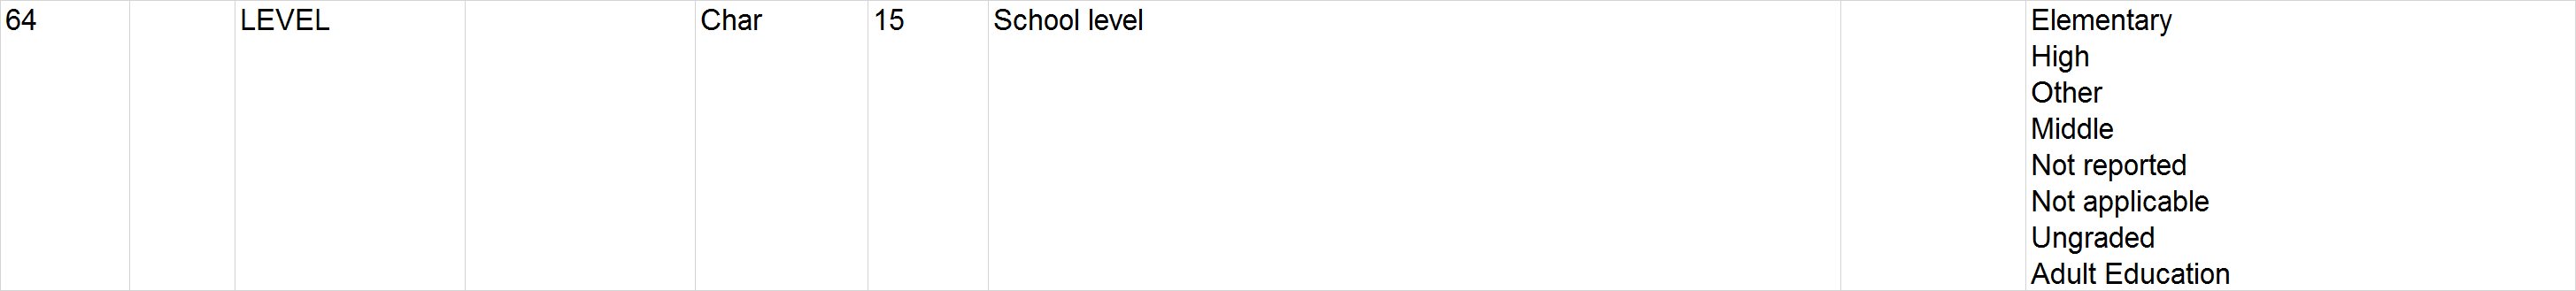

In [26]:
db_district[['SCH_NAME', 'LEVEL']]

,SCH_NAME,LEVEL
4455,DEWITT HIGH SCHOOL,High
4456,DEWITT MIDDLE SCHOOL,Middle
4457,DEWITT ELEMENTARY SCHOOL,Elementary
4458,GILLETT ELEMENTARY SCHOOL,Elementary
4460,SEACBEC (WARREN),High
4461,EASTSIDE NEW VISION CHARTER SCHOOL,Elementary
4462,WARREN HIGH SCHOOL DISTRICT CONVERSION CHARTER,High
4463,WARREN MIDDLE SCHOOL,Middle
4464,BRUNSON NEW VISION CHARTER SCHOOL,Elementary
4465,CENTRAL ELEMENTARY SCHOOL,Elementary


In [27]:
def schoolLevel (inputValue):
    
    
    
    d = {"HIGH SCHOOL"            :     "High",
        "MIDDLE"                  :     "Middle",
        "JUNIOR HIGH"             :     "Middle",
        "ADMINISTRATION"          :     "Administration",
        "ADMINISTRATIVE"          :     "Administration",
        "ELEMENTARY"              :     "Elementary",
        "SENIOR HIGH"             :     "High",
        "INTERMEDIATE"            :     "Middle",
        "BUS"                     :     "Support",
        "SUPERINTENDENT"          :     "Adminstration",
         "MAINTENANCE"            :     "Support",
         "WAREHOUSE"              :     "Support",
         "DISTRICT"               :     "Administration",
         "CENTRAL"                :     "Administration",
         "HIGH"                   :     "High"
        
                     
        }
    
    
    level = []
    for key in d.keys():
        
        if key in inputValue.upper():
            level.append(d[key].upper())
            if key == "JUNIOR HIGH":
                level = [d['JUNIOR HIGH'].upper()]
                break
            
    return level


s = "PLEASANT VW JUNIOR HIGH SCHOOL"
schoolLevel(s)

['MIDDLE']

In [28]:
df['level'] = df.normLocDesc.astype(str).map(schoolLevel)

In [29]:
df[['normLocDesc', 'level']]

,normLocDesc,level
0,PINE BLUFF HIGH SCHOOL,"[HIGH, HIGH]"
1,JACK ROBEY JUNIOR HIGH SCHOOL,[MIDDLE]
2,W T CHENEY ELEMENTARY SCHOOL,[ELEMENTARY]
3,WAREHOUSE,[SUPPORT]
4,SOUTHWOOD ELEMENTARY SCHOOL,[ELEMENTARY]
5,PINE BLUFF SCHOOL ADMINISTRATION BUILDING,[ADMINISTRATION]
6,FIRST WARD,[]
7,SOUTHEAST MIDDLE SCHOOL,[MIDDLE]
8,JORDAN CHANAY BUILDING,[]
9,GIFTEDTALENTED SCOGGINS MAY HALL,[]


In [30]:
df[['normLocDesc', 'level']].to_csv('test_levels.csv', header = True)

# Build blocker and match

In [31]:
df.sort_values(by = "EducationID", inplace = True)

In [32]:
df.index

Int64Index([567, 568, 569, 570, 571, 572, 573, 574, 575, 135,
            ...
            613, 620, 619, 618, 617, 616, 615, 612, 614, 621],
           dtype='int64', length=1846)

In [33]:
y = ['support', 'administration']
levels = ['administration']

l = [level for level in levels if level not in y]
print (l, l != [])
    

[] False


In [34]:
results = []
SCHID = []
eduid = None

for idx in df.index:
    
    #print (idx)
    query = df.loc[idx]['normLocDesc']
    #query = handle_words(query, exclude = SCHOOL_NOISYWORDS)
    #print (query)
    db_idx = df.loc[idx]['EducationID']
    #print (db_idx)
    block= db[db.LEAIDs == db_idx]
    choices = block.norm_SCH_NAME
    #choices = choices.map(lambda x: handle_words(x, exclude = SCHOOL_NOISYWORDS))
    #choices = handle_strings(choices, set(SCHOOL_NOISYWORDS))
    #print(choices)
    levels_cant_match = ['SUPPORT', 'ADMINISTRATION']
    #levels = df.loc[idx]['level']
    #print (levels)
    #sort out the support and admin buildings as these are not in NCES.  Don't try to match them in else.
    
    level = df.loc[idx]['level']
    
    match = True
    for lev in level:
        if lev.upper() in levels_cant_match:
            match = False
    
    if match == True:
   
        result = process.extractBests(query, choices)
    
    
        # convert best_idx to best_SCHID

        new_result = []

        for tup in result:
            ndx = tup[2]
            schid = db.loc[ndx]['SCHID'].astype(int)
            new_tup = (tup[0], tup[1], schid)
            new_result.append(new_tup)
        
        result = new_result
   
    
    else:
        result = []
    
    
        
    
    
    results.append(result)   
      


In [35]:
df['results'] = results

In [36]:
def ret_list(ls, ndx = 0):
    if ls != []:
        return ls[0][ndx]

In [37]:
df['match']= df.results.map(ret_list)

In [38]:
df['score']= df.results.map(lambda x: ret_list(x, ndx = 1) )

In [39]:
df[['EducationID','results', 'normLocDesc', 'level', 'match', 'score']].to_excel("Sample_match.xlsx")


In [40]:
df['results']

567     [(DEWITT HIGH SCHOOL, 100, 500216), (DEWITT MI...
568     [(GILLETT ELEMENTARY SCHOOL, 100, 500391), (DE...
569     [(DEWITT MIDDLE SCHOOL, 100, 500217), (DEWITT ...
570     [(DEWITT ELEMENTARY SCHOOL, 100, 500218), (GIL...
571     [(DEWITT MIDDLE SCHOOL, 57, 500217), (DEWITT H...
572                                                    []
573     [(DEWITT HIGH SCHOOL, 50, 500216), (DEWITT MID...
574     [(DEWITT HIGH SCHOOL, 81, 500216), (GILLETT EL...
575                                                    []
135     [(WARREN HIGH SCHOOL DISTRICT CONVERSION CHART...
132     [(EASTSIDE NEW VISION CHARTER SCHOOL, 86, 5011...
136     [(SEACBEC WARREN, 90, 500543), (EASTSIDE NEW V...
137                                                    []
138     [(WARREN HIGH SCHOOL DISTRICT CONVERSION CHART...
139     [(SEACBEC WARREN, 45, 500543), (WARREN HIGH SC...
140                                                    []
133     [(WARREN HIGH SCHOOL DISTRICT CONVERSION CHART...
134     [(WARR

In [41]:
df['u_level'] = [set(x) if x else None for x in list(df.level)]

In [42]:
df['u_level']

567                           {HIGH}
568                     {ELEMENTARY}
569                         {MIDDLE}
570                     {ELEMENTARY}
571                             None
572                 {ADMINISTRATION}
573                             None
574                           {HIGH}
575                        {SUPPORT}
135                           {HIGH}
132                             None
136                             None
137                 {ADMINISTRATION}
138                             None
139                             None
140                        {SUPPORT}
133                     {ELEMENTARY}
134                         {MIDDLE}
1110    {ADMINISTRATION, ELEMENTARY}
1111                    {ELEMENTARY}
1109                          {HIGH}
1126                    {ELEMENTARY}
1128                          {HIGH}
1127                        {MIDDLE}
1125                    {ELEMENTARY}
769                 {ADMINISTRATION}
760                     {ELEMENTARY}
7

In [43]:
df.u_level = [list(x) if x is not None else None for x in df.u_level]
df.u_level

567                           [HIGH]
568                     [ELEMENTARY]
569                         [MIDDLE]
570                     [ELEMENTARY]
571                             None
572                 [ADMINISTRATION]
573                             None
574                           [HIGH]
575                        [SUPPORT]
135                           [HIGH]
132                             None
136                             None
137                 [ADMINISTRATION]
138                             None
139                             None
140                        [SUPPORT]
133                     [ELEMENTARY]
134                         [MIDDLE]
1110    [ADMINISTRATION, ELEMENTARY]
1111                    [ELEMENTARY]
1109                          [HIGH]
1126                    [ELEMENTARY]
1128                          [HIGH]
1127                        [MIDDLE]
1125                    [ELEMENTARY]
769                 [ADMINISTRATION]
760                     [ELEMENTARY]
7

# Try to match using an approach that tokenizes and uses TFIDF techniques to give more weight to words

In [44]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
X = df.normLocDesc.values
X
vectorizer = TfidfVectorizer(ngram_range=(1,1))
dtm = vectorizer.fit_transform(X)

In [46]:
dtm

<1846x1105 sparse matrix of type '<class 'numpy.float64'>'
	with 5146 stored elements in Compressed Sparse Row format>

In [47]:
vectorizer.vocabulary_

{'dewitt': 335,
 'high': 506,
 'school': 880,
 'gillett': 445,
 'elementary': 370,
 'middle': 687,
 'special': 930,
 'services': 896,
 'administration': 82,
 'building': 199,
 'all': 95,
 'buildings': 201,
 'maintenancebus': 644,
 'shop': 907,
 'warren': 1045,
 'eastside': 359,
 'primary': 817,
 'seacbec': 889,
 'cultural': 307,
 'center': 238,
 'parenting': 771,
 'food': 409,
 'service': 895,
 'warehouse': 1043,
 'brunson': 196,
 'central': 242,
 'park': 772,
 'corning': 289,
 'east': 357,
 'senior': 892,
 'schooljr': 881,
 'junior': 575,
 'west': 1053,
 'sheridan': 904,
 'end': 381,
 'nan': 713,
 'intermediate': 542,
 'alc': 91,
 'freshman': 423,
 'academy': 72,
 'schools': 882,
 'bus': 205,
 'barn': 144,
 'preschool': 815,
 'multi': 707,
 'purpose': 826,
 'bldg': 173,
 'agriculture': 88,
 'safe': 875,
 'room': 870,
 'ram': 832,
 'cafeteria': 215,
 'garage': 431,
 'oak': 735,
 'grove': 466,
 'baldwin': 137,
 'of': 744,
 'the': 983,
 '21st': 50,
 'century': 243,
 'woodrow': 1081,
 'wi

In [48]:
dtm_df = pd.DataFrame(data = dtm.A, columns = vectorizer.get_feature_names())
dtm_df

,00,000,004,007,04,051,052,053,054,055,...,zdistrict,zz,zzdo,zzz,zzzdo,zzzzz,zzzzzdonotusezzzacorn,zzzzzdonotusezzzoden,zzzzzz,zzzzzzdo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
feat_names = vectorizer.get_feature_names()
feat_names

['00',
 '000',
 '004',
 '007',
 '04',
 '051',
 '052',
 '053',
 '054',
 '055',
 '056',
 '057',
 '058',
 '060',
 '061',
 '063',
 '064',
 '067',
 '069',
 '070',
 '076',
 '080',
 '082',
 '084',
 '095',
 '10th',
 '11',
 '1124',
 '11th',
 '12',
 '1200',
 '1201',
 '12359',
 '12th',
 '17',
 '1701',
 '18',
 '1800',
 '19',
 '1903000',
 '1905000',
 '1905014',
 '1905015',
 '1905016',
 '1905017',
 '20',
 '2010',
 '2012',
 '204',
 '211',
 '21st',
 '27',
 '28',
 '29',
 '2903007',
 '31417',
 '35',
 '411',
 '4a',
 '4th',
 '500',
 '5205',
 '53',
 '536',
 '5th',
 '601',
 '62117',
 '6th',
 '705',
 '7th8th',
 '9th',
 'abc',
 'academy',
 'ace',
 'acorn',
 'actc',
 'activities',
 'activity',
 'adkins',
 'admin',
 'adminbus',
 'admincafedistrictmusic',
 'administration',
 'administrative',
 'administrativesupport',
 'adminnew',
 'adult',
 'ag',
 'agriculture',
 'ahlf',
 'albright',
 'alc',
 'ale',
 'alecareer',
 'alemain',
 'all',
 'allen',
 'allison',
 'allps',
 'alma',
 'alpena',
 'alt',
 'alternative',
 'a

In [50]:
sample = df.normLocDesc.values
concat = " ".join(sample)
wordslist = nltk.word_tokenize(concat)
wordslist

['DEWITT',
 'HIGH',
 'SCHOOL',
 'GILLETT',
 'ELEMENTARY',
 'SCHOOL',
 'DEWITT',
 'MIDDLE',
 'SCHOOL',
 'DEWITT',
 'ELEMENTARY',
 'SCHOOL',
 'DEWITT',
 'SPECIAL',
 'SERVICES',
 'ADMINISTRATION',
 'BUILDING',
 'ALL',
 'SCHOOL',
 'BUILDINGS',
 'GILLETT',
 'HIGH',
 'SCHOOL',
 'MAINTENANCEBUS',
 'SHOP',
 'WARREN',
 'HIGH',
 'SCHOOL',
 'EASTSIDE',
 'PRIMARY',
 'SEACBEC',
 'ADMINISTRATION',
 'CULTURAL',
 'CENTER',
 'PARENTING',
 'CENTER',
 'FOOD',
 'SERVICE',
 'WAREHOUSE',
 'BRUNSON',
 'ELEMENTARY',
 'SCHOOL',
 'MIDDLE',
 'SCHOOL',
 'CENTRAL',
 'ELEMENTARY',
 'SCHOOL',
 'PARK',
 'ELEMENTARY',
 'SCHOOL',
 'CORNING',
 'HIGH',
 'SCHOOL',
 'EAST',
 'ELEMENTARY',
 'SCHOOL',
 'SENIOR',
 'HIGH',
 'SCHOOLJR',
 'HIGH',
 'SCHOOL',
 'JUNIOR',
 'HIGH',
 'SCHOOL',
 'WEST',
 'ELEMENTARY',
 'SCHOOL',
 'ADMINISTRATION',
 'SHERIDAN',
 'ELEMENTARY',
 'SCHOOL',
 'SHERIDAN',
 'MIDDLE',
 'SCHOOL',
 'EAST',
 'END',
 'ELEMENTARY',
 'SCHOOL',
 'NAN',
 'EAST',
 'END',
 'INTERMEDIATE',
 'SCHOOL',
 'SHERIDAN',
 'INTERM

In [51]:
fd = nltk.FreqDist(wordslist )
fd.most_common(50)

[('SCHOOL', 1008),
 ('ELEMENTARY', 452),
 ('HIGH', 344),
 ('MIDDLE', 153),
 ('ADMINISTRATION', 126),
 ('JUNIOR', 73),
 ('CAMPUS', 64),
 ('BUILDING', 62),
 ('NAN', 47),
 ('CENTRAL', 45),
 ('OFFICE', 43),
 ('CENTER', 42),
 ('BUS', 42),
 ('DISTRICT', 39),
 ('COMPLEX', 38),
 ('NOT', 36),
 ('INTERMEDIATE', 34),
 ('PRIMARY', 33),
 ('PRE', 30),
 ('DO', 29),
 ('USE', 29),
 ('CAFETERIA', 26),
 ('OLD', 26),
 ('SERVICES', 25),
 ('K', 24),
 ('MAINTENANCE', 24),
 ('SHOP', 22),
 ('ATHLETIC', 22),
 ('TRANSPORTATION', 22),
 ('GARAGE', 20),
 ('EDUCATION', 20),
 ('SPECIAL', 18),
 ('FIELD', 18),
 ('ZZZ', 18),
 ('GYM', 18),
 ('WEST', 17),
 ('BLDG', 17),
 ('WAREHOUSE', 16),
 ('PARK', 16),
 ('ACADEMY', 16),
 ('NEW', 16),
 ('MAGNET', 16),
 ('HOUSE', 15),
 ('ALL', 14),
 ('EAST', 14),
 ('PRESCHOOL', 14),
 ('WIDE', 13),
 ('NORTH', 13),
 ('HEIGHTS', 12),
 ('FOOD', 11)]

In [52]:
finder = nltk.BigramCollocationFinder.from_words(wordslist)
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder.nbest(bigram_measures.raw_freq, 100)

[('ELEMENTARY', 'SCHOOL'),
 ('HIGH', 'SCHOOL'),
 ('MIDDLE', 'SCHOOL'),
 ('JUNIOR', 'HIGH'),
 ('SCHOOL', 'ADMINISTRATION'),
 ('SCHOOL', 'HIGH'),
 ('INTERMEDIATE', 'SCHOOL'),
 ('SCHOOL', 'MIDDLE'),
 ('DO', 'NOT'),
 ('NOT', 'USE'),
 ('SCHOOL', 'NAN'),
 ('ADMINISTRATION', 'BUILDING'),
 ('SCHOOL', 'ELEMENTARY'),
 ('PRIMARY', 'SCHOOL'),
 ('SCHOOL', 'DISTRICT'),
 ('SCHOOL', 'CAMPUS'),
 ('BUS', 'GARAGE'),
 ('CENTRAL', 'OFFICE'),
 ('PRE', 'SCHOOL'),
 ('SCHOOL', 'BUS'),
 ('ELEMENTARY', 'CAMPUS'),
 ('SCHOOL', 'CENTRAL'),
 ('ATHLETIC', 'COMPLEX'),
 ('PRE', 'K'),
 ('ZZZ', 'DO'),
 ('BUS', 'SHOP'),
 ('ADMINISTRATION', 'OFFICE'),
 ('DISTRICT', 'WIDE'),
 ('SCHOOL', 'OLD'),
 ('SPECIAL', 'EDUCATION'),
 ('SCHOOL', 'EAST'),
 ('SCHOOL', 'JUNIOR'),
 ('SCHOOL', 'NEW'),
 ('CENTRAL', 'ELEMENTARY'),
 ('MAGNET', 'SCHOOL'),
 ('SCHOOL', 'CAFETERIA'),
 ('SCHOOL', 'JNPSD'),
 ('SCHOOL', 'ZZZ'),
 ('ALL', 'LOCATIONS'),
 ('FIELD', 'HOUSE'),
 ('HEIGHTS', 'ELEMENTARY'),
 ('SCHOOL', 'ALL'),
 ('SCHOOL', 'ATHLETIC'),
 ('SCHOO

In [53]:
concat

'DEWITT HIGH SCHOOL GILLETT ELEMENTARY SCHOOL DEWITT MIDDLE SCHOOL DEWITT ELEMENTARY SCHOOL DEWITT SPECIAL SERVICES ADMINISTRATION BUILDING ALL SCHOOL BUILDINGS GILLETT HIGH SCHOOL MAINTENANCEBUS SHOP WARREN HIGH SCHOOL EASTSIDE PRIMARY SEACBEC ADMINISTRATION CULTURAL CENTER PARENTING CENTER FOOD SERVICE WAREHOUSE BRUNSON ELEMENTARY SCHOOL MIDDLE SCHOOL CENTRAL ELEMENTARY SCHOOL PARK ELEMENTARY SCHOOL CORNING HIGH SCHOOL EAST ELEMENTARY SCHOOL SENIOR HIGH SCHOOLJR HIGH SCHOOL JUNIOR HIGH SCHOOL WEST ELEMENTARY SCHOOL ADMINISTRATION SHERIDAN ELEMENTARY SCHOOL SHERIDAN MIDDLE SCHOOL EAST END ELEMENTARY SCHOOL NAN EAST END INTERMEDIATE SCHOOL SHERIDAN INTERMEDIATE SCHOOL ALC SHERIDAN FRESHMAN ACADEMY SHERIDAN HIGH SCHOOL ALL SCHOOLS BUS SHOP BUS BARN PRESCHOOL ELEMENTARY SCHOOL MULTI PURPOSE BLDG HIGH SCHOOL JUNIOR HIGH SCHOOL AGRICULTURE SAFE ROOM RAM ACADEMY CAFETERIA BUS GARAGE PRIMARY SCHOOL OAK GROVE MIDDLE SCHOOL BALDWIN ELEMENTARY SCHOOL SCHOOL OF THE 21ST CENTURY WOODROW WILSON EL

In [54]:
from cleanco import cleanco

s = "prevost middle school"
cleanco(s).clean_name()    # doesn't work for schools!

'prevost middle school'

In [55]:
tokens = s.split(" ")
tokens

['prevost', 'middle', 'school']

In [56]:
pos = nltk.pos_tag(tokens)
pos

[('prevost', 'NN'), ('middle', 'JJ'), ('school', 'NN')]

In [57]:
ne = nltk.ne_chunk(pos)
list(ne)

[('prevost', 'NN'), ('middle', 'JJ'), ('school', 'NN')]

In [58]:
ne[0][0]



'prevost'

In [69]:
sentences = [sent for sent in df.normLocDesc]
sentences = [nltk.word_tokenize(sent) for sent in sentences]
sentences = [nltk.pos_tag(sent) for sent in sentences]
sentences = [nltk.ne_chunk(sent, binary = True) for sent in sentences]
sentences


[Tree('S', [Tree('NE', [('DEWITT', 'NNP')]), ('HIGH', 'NNP'), ('SCHOOL', 'NNP')]),
 Tree('S', [Tree('NE', [('GILLETT', 'NNP')]), ('ELEMENTARY', 'NNP'), ('SCHOOL', 'NNP')]),
 Tree('S', [Tree('NE', [('DEWITT', 'NNP')]), Tree('NE', [('MIDDLE', 'NNP')]), ('SCHOOL', 'NNP')]),
 Tree('S', [Tree('NE', [('DEWITT', 'NNP')]), ('ELEMENTARY', 'NNP'), ('SCHOOL', 'NNP')]),
 Tree('S', [Tree('NE', [('DEWITT', 'NNP')]), ('SPECIAL', 'NNP'), ('SERVICES', 'NNP')]),
 Tree('S', [Tree('NE', [('ADMINISTRATION', 'NNP')]), ('BUILDING', 'NN')]),
 Tree('S', [('ALL', 'DT'), Tree('NE', [('SCHOOL', 'NNP')]), ('BUILDINGS', 'NNP')]),
 Tree('S', [Tree('NE', [('GILLETT', 'NNP')]), ('HIGH', 'NNP'), ('SCHOOL', 'NNP')]),
 Tree('S', [Tree('NE', [('MAINTENANCEBUS', 'NNP')]), ('SHOP', 'NNP')]),
 Tree('S', [Tree('NE', [('WARREN', 'NNP')]), ('HIGH', 'NNP'), ('SCHOOL', 'NNP')]),
 Tree('S', [Tree('NE', [('EASTSIDE', 'NNP')]), ('PRIMARY', 'NNP')]),
 Tree('S', [Tree('NE', [('SEACBEC', 'NN')])]),
 Tree('S', [Tree('NE', [('ADMINISTRAT

In [74]:
sentences = [nltk.tree2conlltags(sent) for sent in sentences]
sentences

[[('DEWITT', 'NNP', 'O'), ('HIGH', 'NNP', 'O'), ('SCHOOL', 'NNP', 'O')],
 [('GILLETT', 'NNP', 'O'), ('ELEMENTARY', 'NNP', 'O'), ('SCHOOL', 'NNP', 'O')],
 [('DEWITT', 'NNP', 'O'), ('MIDDLE', 'NNP', 'O'), ('SCHOOL', 'NNP', 'O')],
 [('DEWITT', 'NNP', 'O'), ('ELEMENTARY', 'NNP', 'O'), ('SCHOOL', 'NNP', 'O')],
 [('DEWITT', 'NNP', 'O'), ('SPECIAL', 'NNP', 'O'), ('SERVICES', 'NNP', 'O')],
 [('ADMINISTRATION', 'NNP', 'O'), ('BUILDING', 'NN', 'O')],
 [('ALL', 'DT', 'O'), ('SCHOOL', 'NNP', 'O'), ('BUILDINGS', 'NNP', 'O')],
 [('GILLETT', 'NNP', 'O'), ('HIGH', 'NNP', 'O'), ('SCHOOL', 'NNP', 'O')],
 [('MAINTENANCEBUS', 'NNP', 'O'), ('SHOP', 'NNP', 'O')],
 [('WARREN', 'NNP', 'O'), ('HIGH', 'NNP', 'O'), ('SCHOOL', 'NNP', 'O')],
 [('EASTSIDE', 'NNP', 'O'), ('PRIMARY', 'NNP', 'O')],
 [('SEACBEC', 'NN', 'O')],
 [('ADMINISTRATION', 'NN', 'O')],
 [('CULTURAL', 'NNP', 'O'), ('CENTER', 'NNP', 'O')],
 [('PARENTING', 'NN', 'O'), ('CENTER', 'NN', 'O')],
 [('FOOD', 'NNP', 'O'), ('SERVICE', 'NNP', 'O'), ('WAREHO

# Compare 2 approaches

In [ ]:
df_old = pd.read_csv('sample_match.csv')
df_old.NCESSCH = df_old.NCESSCH.astype(str)
print(df_old.shape)

In [ ]:
_, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10,4))
df_res.Score.hist(ax=ax1).set_title('Only Name')
ax1.vlines(df_res.Score.mean(), ymin=0, ymax=600, label='Mean Score %.2f' % df_res.Score.mean())
ax1.legend()
df_old.Score.hist(ax=ax2).set_title('Name+Address')
ax2.vlines(df_old.Score.mean(), ymin=0, ymax=600, label='Mean Score %.2f' % df_old.Score.mean())
ax2.legend();

**We can see 2 groups in case of matching only names: **
- in first group matches are almost exact (score > 80)
- in second one scores are quite low

**Mean score is slightly higher for matching only names**

In [ ]:
df_cmp = pd.merge(df_res, df_old, on='un_loc', suffixes=('_on', '_na'))
print(df_cmp.shape)
df_cmp.columns

In [ ]:
df_cmp['equal_NCESSCH'] = (df_cmp.NCESSCH_on == df_cmp.NCESSCH_na).astype(int)
df_cmp.equal_NCESSCH.value_counts(normalize=True)

**NCESSCH are the same for 54% of samples**

In [ ]:
_, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(8,8))
df_cmp.Score_on[df_cmp.equal_NCESSCH==0].hist(ax=axes[0][0]).set_title('Only Name - Different NCESSCH')
df_cmp.Score_on[df_cmp.equal_NCESSCH==1].hist(ax=axes[0][1]).set_title('Only Name - Same NCESSCH')
df_cmp.Score_na[df_cmp.equal_NCESSCH==0].hist(ax=axes[1][0]).set_title('Name+Address - Different NCESSCH')
df_cmp.Score_na[df_cmp.equal_NCESSCH==1].hist(ax=axes[1][1]).set_title('Name+Address - Same NCESSCH');

# Test script

In [ ]:
!python fuzzy_script.py -o sample_match_name_only.csv